In [3]:
import numpy as np #guna untuk menyediakan fungsi yang siap pakai untuk memudahkan kita melakukan perhitungan saintifik seperti matriks, aljabar, statistik, dan sebagainya
import pandas as pd #guna untuk membaca nama file dari csv atau txt lainnya
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier#Untuk menggunakan KNN
from sklearn.model_selection import train_test_split #digunakan untuk proses training dan testing merupakan kumpulan data yang berbeda.
from sklearn.metrics import confusion_matrix #memberikan informasi perbandingan hasil klasifikasi yang dilakukan oleh sistem (model) dengan hasil klasifikasi sebenarnya.
from sklearn.metrics import classification_report # Memberikan Report
from sklearn.metrics import accuracy_score #memberikan skor akurasi
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
#
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings("ignore", category=DataConversionWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [4]:
dataset = pd.read_csv('prediksicuaca.csv') #membaca dataset yang ada

In [5]:
dataset #menampilkan seluruh isi dataset

,date,precipitation,temp_max,temp_min,wind,weather,Prediction
0,1/1/2012,0.0,12.8,5.0,4.7,drizzle,1
1,1/2/2012,10.9,10.6,2.8,4.5,rain,3
2,1/3/2012,0.8,11.7,7.2,2.3,rain,3
3,1/4/2012,20.3,12.2,5.6,4.7,rain,3
4,1/5/2012,1.3,8.9,2.8,6.1,rain,3
...,...,...,...,...,...,...,...
1456,12/27/2015,8.6,4.4,1.7,2.9,rain,3
1457,12/28/2015,1.5,5.0,1.7,1.3,rain,3
1458,12/29/2015,0.0,7.2,0.6,2.6,fog,5
1459,12/30/2015,0.0,5.6,-1.0,3.4,sun,4


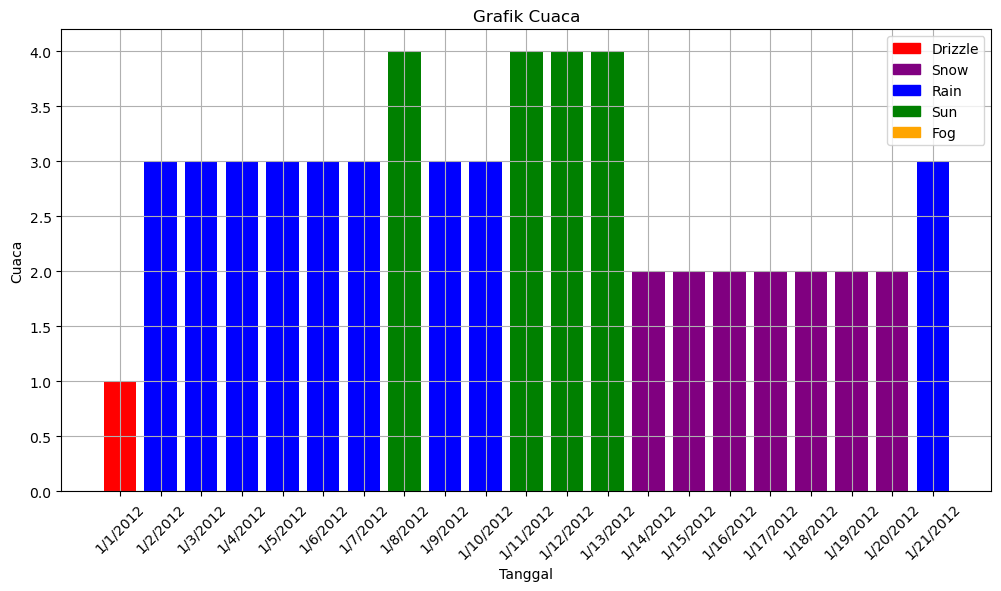

In [6]:
# Ambil kolom 'Date' dan 'Weather' dari dataset
dates = dataset.loc[0:20, 'date']
weather = dataset.loc[0:20, 'Prediction']

# Membuat plot
plt.figure(figsize=(12, 6))

# Menentukan warna untuk setiap nilai cuaca
colors = {1: 'red', 2: 'purple', 3: 'blue', 4: 'green', 5: 'orange'}

# Menggambar batang bar dengan warna yang sesuai
for i in range(len(dates)):
    plt.bar(dates[i], weather[i], color=colors[weather[i]])

# Menambahkan label dan judul
plt.xlabel('Tanggal')
plt.ylabel('Cuaca')
plt.title('Grafik Cuaca')

# Menampilkan grid
plt.grid(True)

# Memutar label tanggal agar tidak tumpang tindih
plt.xticks(rotation=45)

# Membuat legenda
labels = ['Drizzle', 'Snow', 'Rain', 'Sun', 'Fog']
legend_elements = [plt.Rectangle((0, 0), 1, 1, color=colors[i+1]) for i in range(len(colors))]
plt.legend(legend_elements, labels, loc='upper right')

# Menampilkan plot
plt.show()


In [7]:
print(dataset.shape) #menampilkan ada berapa baris dan kolom ( ada 1461 baris, dan 7kolom)
dataset.head(10) #menampilkan 10 data pertama dimulai dari 0

(1461, 7)


,date,precipitation,temp_max,temp_min,wind,weather,Prediction
0,1/1/2012,0.0,12.8,5.0,4.7,drizzle,1
1,1/2/2012,10.9,10.6,2.8,4.5,rain,3
2,1/3/2012,0.8,11.7,7.2,2.3,rain,3
3,1/4/2012,20.3,12.2,5.6,4.7,rain,3
4,1/5/2012,1.3,8.9,2.8,6.1,rain,3
5,1/6/2012,2.5,4.4,2.2,2.2,rain,3
6,1/7/2012,0.0,7.2,2.8,2.3,rain,3
7,1/8/2012,0.0,10.0,2.8,2.0,sun,4
8,1/9/2012,4.3,9.4,5.0,3.4,rain,3
9,1/10/2012,1.0,6.1,0.6,3.4,rain,3


In [8]:
nama_cuaca = dict(zip(dataset.Prediction.unique(), dataset.weather.unique())) #mengembalikan nilai sesuai dengan argumen yang diberikan
nama_cuaca

{1: 'drizzle', 3: 'rain', 4: 'sun', 2: 'snow', 5: 'fog'}

In [9]:
dataset[dataset["Prediction"]==1].shape #disini hanya terdapat 53 data yang menunjukan keadaan Drizzle

(53, 7)

In [10]:
dataset[dataset["Prediction"]==2].shape #disini hanya terdapat 26 data yang menunjukan keadaan Snow

(26, 7)

In [11]:
dataset[dataset["Prediction"]==3].shape #disini terdapat 641 data yang menunjukan keadaan Rain

(641, 7)

In [12]:
dataset[dataset["Prediction"]==4].shape #disini terdapat 640 data yang menunjukan keadaan Sun

(640, 7)

In [16]:
dataset[dataset["Prediction"]==5].shape #disini hanya terdapat 101 data yang menunjukan keadaan Fog

(101, 7)

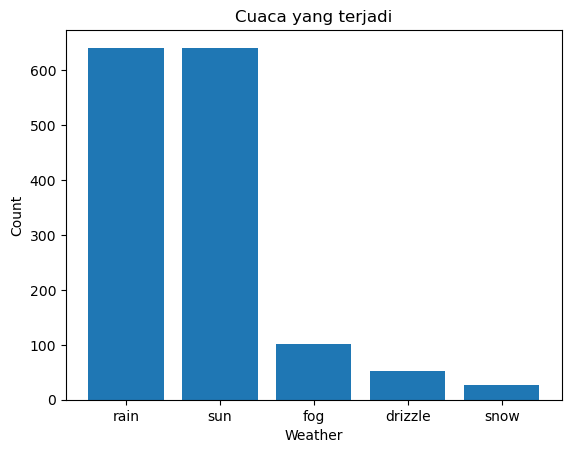

In [13]:
# Menghitung jumlah kemunculan setiap nilai dalam kolom "weather"
weather_counts = dataset["weather"].value_counts()

# Plot histogram
plt.bar(weather_counts.index, weather_counts.values)
plt.xlabel('Weather')
plt.ylabel('Count')
plt.title('Cuaca yang terjadi')
plt.show()

In [14]:
# Menentukan variabel bebas (X) dan variabel terikat (y)
x = dataset[['precipitation', 'temp_max', 'temp_min', 'wind']]
y = dataset['Prediction']

# Memisahkan data latih dan data uji
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Mengaplikasikan SMOTE oversampling pada data latih
smote = SMOTE()
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Melatih model k-NN pada data latih yang telah diresampling
knn = KNeighborsClassifier()
knn.fit(x_train_resampled, y_train_resampled)

# Melakukan prediksi pada data uji
y_pred = knn.predict(x_test)

# Melihat classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.06      0.30      0.09        10
           2       0.43      1.00      0.60         6
           3       0.95      0.71      0.81       123
           4       0.65      0.42      0.51       125
           5       0.17      0.31      0.22        29

    accuracy                           0.54       293
   macro avg       0.45      0.55      0.45       293
weighted avg       0.70      0.54      0.59       293

